In [3]:
import pickle
import pandas as pd

In [4]:
with open( "final_topper.pickle", "rb" ) as file:
    topper = pickle.load(file)

In [6]:
with open( "final_smart_review.pickle", "rb" ) as file:
    smart = pickle.load(file)

In [8]:
from konlpy.tag import Okt

In [9]:
okt = Okt()

In [18]:
cleaned_contents_list = []

for content in topper['내용']:
    # 공백 및 줄바꿈 제거
    cleaned_content = content.strip()  # 양쪽 공백 제거
    
    # 연속된 공백을 단일 공백으로 변환
    cleaned_content = ' '.join(cleaned_content.split())
    
    cleaned_contents_list.append(cleaned_content)

In [20]:
stopwords = ['있다', '되다', '하다', '나', '는', '은', '이', '가', '을', '를', '에', '에서', 
             '에게', '한테', '과', '와', '아', '랑', '으로', '로', '께서', '이나', '이라', '이야', 
             '인가', '이야말로', '그리고', '그런데', '그래서', '그래도', '그러나', '그럼에도', '그러면', 
             '그러니까', '그러므로', '그러니까', '그렇게', '그렇지만', '그렇다면', '아니면', '아니라', 
             '그런', '이런', '그렇지', '그래', '저런', '이러한', '그러한', '저러한', '어떤', '이따', 
             '이래', '이렇게', '저렇게', '그따', '그래서', '아무', '전부', '가지', '갖고', '몇', 
             '무슨', '어느', '몇몇', '어떤', '어떻게', '어떤', '아무', '나', '우리', '당신', '자기', 
             '그녀', '저희', '하다', '되다', '않다', '없다', '있다', '되어다', '하고', '그러면', 
             '그래서', '이렇게', '저렇게', '요즘', '그것', '이것', '저것', '있다고', '그렇지만', '그래도'
            '코웨이', '안녕하세요', '웅진코웨이', '\u200b', '이다', '안녕하다', '아니다', '같다']

In [21]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)
    words = [word for word, tag in pos_words if tag in ['Adjective'] if word not in stopwords]
    return words

In [22]:
#추출된 단어들을 저장할 리스트
extracted_words_list = []

# cleaned_contents_list에 있는 각 텍스트에 대해 okt_pos_tagging 함수 호출하여 추출된 단어들 리스트에 저장
for text in cleaned_contents_list:
    extracted_words = okt_pos_tagging(text)
    extracted_words_list.append(extracted_words)

# 저장된 추출된 단어들 리스트 출력
for idx, extracted_words in enumerate(extracted_words_list, start=1):
    print(f'추출된 단어들: {extracted_words}')
    print()

추출된 단어들: ['못지않다', '푹신하다', '착하다']

추출된 단어들: ['딱딱하다', '아프다', '좋다']

추출된 단어들: ['좁다', '안되다', '단단하다', '낮다', '만족하다']

추출된 단어들: ['푹신하다', '좋다']

추출된 단어들: ['좋다', '딱딱하다', '좋다']

추출된 단어들: ['빨르다', '편리하다', '불편하다', '좋다', '편하다']

추출된 단어들: ['푹신하다', '좋다', '작다', '작다', '깔끔하다', '좋다']

추출된 단어들: ['예민하다', '힘드다', '굳다', '굳다']

추출된 단어들: ['탁하다', '포근하다']

추출된 단어들: ['사랑스럽다', '포근하다']

추출된 단어들: ['푹신하다', '딱딱하다', '좋아하다', '충분하다']

추출된 단어들: ['탱탱하다', '굉장하다']

추출된 단어들: ['저렴하다', '편하다']

추출된 단어들: ['빨르다', '푹신하다', '좋다', '만족하다']

추출된 단어들: ['나쁘다', '괜찮다']

추출된 단어들: ['곤란하다', '푹신하다', '좋다']

추출된 단어들: ['얇다', '좋다']

추출된 단어들: []

추출된 단어들: []

추출된 단어들: ['괜찮다']

추출된 단어들: []

추출된 단어들: ['애매하다', '만족하다', '푹신하다', '좋다']

추출된 단어들: ['푹신하다', '좋다', '푹신하다', '좋다']

추출된 단어들: ['빠르다', '아쉽다', '두껍다']

추출된 단어들: ['짧다', '좋다']

추출된 단어들: ['필요하다']

추출된 단어들: ['괜찮다', '필요하다']

추출된 단어들: ['무겁다', '푹신하다']

추출된 단어들: ['빠르다', '적당하다', '좋다']

추출된 단어들: ['고급스럽다', '괜찮다']

추출된 단어들: ['적당하다', '푹신하다', '아프다', '좋다']

추출된 단어들: ['좋다', '만족스럽다']

추출된 단어들: ['용이하다', '편하다', '딱이다']

추출된 

In [23]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [25]:
count_list = []

for words in extracted_words_list:
    count = Counter(words)
    count.most_common(100)
    count_list.append(count)

In [26]:
count_list

[Counter({'못지않다': 1, '푹신하다': 1, '착하다': 1}),
 Counter({'딱딱하다': 1, '아프다': 1, '좋다': 1}),
 Counter({'좁다': 1, '안되다': 1, '단단하다': 1, '낮다': 1, '만족하다': 1}),
 Counter({'푹신하다': 1, '좋다': 1}),
 Counter({'좋다': 2, '딱딱하다': 1}),
 Counter({'빨르다': 1, '편리하다': 1, '불편하다': 1, '좋다': 1, '편하다': 1}),
 Counter({'좋다': 2, '작다': 2, '푹신하다': 1, '깔끔하다': 1}),
 Counter({'굳다': 2, '예민하다': 1, '힘드다': 1}),
 Counter({'탁하다': 1, '포근하다': 1}),
 Counter({'사랑스럽다': 1, '포근하다': 1}),
 Counter({'푹신하다': 1, '딱딱하다': 1, '좋아하다': 1, '충분하다': 1}),
 Counter({'탱탱하다': 1, '굉장하다': 1}),
 Counter({'저렴하다': 1, '편하다': 1}),
 Counter({'빨르다': 1, '푹신하다': 1, '좋다': 1, '만족하다': 1}),
 Counter({'나쁘다': 1, '괜찮다': 1}),
 Counter({'곤란하다': 1, '푹신하다': 1, '좋다': 1}),
 Counter({'얇다': 1, '좋다': 1}),
 Counter(),
 Counter(),
 Counter({'괜찮다': 1}),
 Counter(),
 Counter({'애매하다': 1, '만족하다': 1, '푹신하다': 1, '좋다': 1}),
 Counter({'푹신하다': 2, '좋다': 2}),
 Counter({'빠르다': 1, '아쉽다': 1, '두껍다': 1}),
 Counter({'짧다': 1, '좋다': 1}),
 Counter({'필요하다': 1}),
 Counter({'괜찮다': 1, '필요하다': 1}),
 Counter({

In [27]:
# 모든 Conter 객체를 합치기
total_counter = Counter()
for counter in count_list:
    total_counter += counter

In [28]:
total_counter

Counter({'좋다': 9534,
         '푹신하다': 3054,
         '편하다': 1815,
         '만족하다': 1198,
         '아프다': 1063,
         '적당하다': 982,
         '괜찮다': 900,
         '탄탄하다': 685,
         '딱딱하다': 671,
         '빠르다': 653,
         '얇다': 595,
         '두껍다': 551,
         '그렇다': 528,
         '불편하다': 511,
         '좋아하다': 487,
         '단단하다': 486,
         '저렴하다': 425,
         '편안하다': 405,
         '부드럽다': 382,
         '만족스럽다': 373,
         '작다': 354,
         '높다': 339,
         '가볍다': 317,
         '포근하다': 316,
         '깔끔하다': 309,
         '아쉽다': 305,
         '이쁘다': 288,
         '예쁘다': 275,
         '낮다': 274,
         '많다': 265,
         '딱이다': 262,
         '따뜻하다': 262,
         '도톰하다': 246,
         '원하다': 235,
         '빨르다': 227,
         '필요하다': 227,
         '시원하다': 211,
         '힘들다': 208,
         '안되다': 207,
         '덥다': 176,
         '확실하다': 173,
         '비싸다': 159,
         '좁다': 158,
         '친절하다': 143,
         '가능하다': 137,
         '안좋다': 135,
         '급하다':

<function matplotlib.pyplot.show(close=None, block=None)>

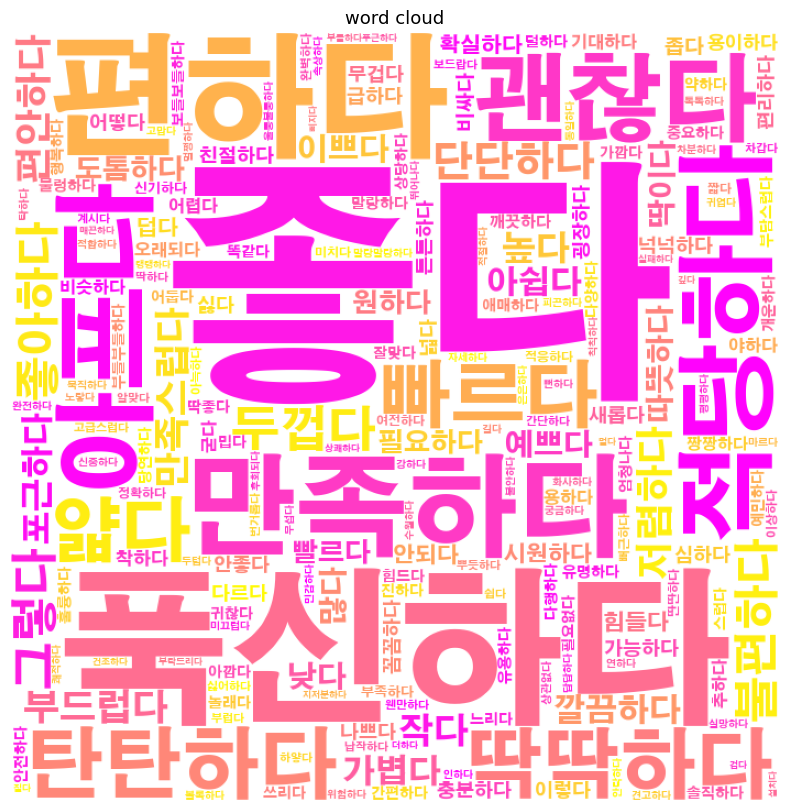

In [31]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='C:\Windows\Fonts\H2GTRE.TTF',
                     width = 700,
                     height = 700,
                     background_color = 'white',
                     colormap = 'spring',
                     random_state = 1).generate_from_frequencies(total_counter)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('word cloud', size=13)
plt.show